In [1]:
import pandas as pd 
import numpy as np
import tensorflow
import keras 

Using TensorFlow backend.


In [2]:
cd desktop

C:\Users\yash\desktop


In [3]:
file = open('upf3b.txt', 'r')

In [4]:
out = [] # list to save lines
while True:
    # Read next line
    line = file.readline()
    # If line is blank, then you struck the EOF
    if not line :
        break;
    out.append(line.strip())   
# Close file 
file.close()

In [8]:
combined = ''
for sequence in out:
    combined += sequence

In [10]:
len(combined)


47718

In [11]:
padded_sequence = 'N' * 5000 + combined + 'N' * 5000

In [12]:
import numpy as np
def one_hot_encode(seq):
    map = np.asarray([[0, 0, 0, 0],
                      [1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])

    seq = seq.upper().replace('A', '\x01').replace('C', '\x02')
    seq = seq.replace('G', '\x03').replace('T', '\x04').replace('N', '\x00')

    return map[np.fromstring(seq, np.int8) % 5]

In [13]:
onehot= one_hot_encode(padded_sequence)

C:\Users\yash\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


In [14]:
from keras.models import load_model

In [17]:
cd models

C:\Users\yash\desktop\spliceai\spliceai\models


In [18]:
from numpy import newaxis
newshapedinput= onehot[newaxis,:,:]

In [19]:
newshapedinput.shape

(1, 57718, 4)

In [20]:
my_model= load_model('spliceai1.h5')
pred= my_model.predict(newshapedinput)
my_model2= load_model('spliceai2.h5')
pred2= my_model2.predict(newshapedinput)
my_model3= load_model('spliceai3.h5')
pred3= my_model3.predict(newshapedinput)
my_model4= load_model('spliceai4.h5')
pred4= my_model4.predict(newshapedinput)
my_model5= load_model('spliceai5.h5')
pred5= my_model5.predict(newshapedinput)

C:\Users\yash\Anaconda3\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [21]:
arr = [pred, pred2, pred3, pred4, pred5]

In [22]:
average = np.mean([arr[m] for m in range(5)], axis = 0)

In [23]:
result = []
for i in average[0]:
    result.append([0, 0, 0])
    result[-1][np.argmax(i)] = 1
    
print(result)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0]

In [24]:
count_100 = 0
count_010 = 0
count_001 = 0
for i in result:
    string = str(i[0]) + str(i[1]) + str(i[2])
    if string == '100':
        count_100+=1
    elif string == '010':
        count_010 += 1
    else:
        count_001+=1
        
print(count_100, count_010, count_001)

47699 9 10


In [25]:
count_100 = 0
count_010 = 0
count_001 = 0
acceptor = []
donor = []
idx = 0
for i in result:
    string = str(i[0]) + str(i[1]) + str(i[2])
    if string == '100':
        count_100+=1
    elif string == '010':
        count_010 += 1
        acceptor.append(idx)
    else:
        count_001+=1
        donor.append(idx)
    idx+=1
        
print(count_100, count_010, count_001)


47699 9 10


In [27]:
import matplotlib.pyplot as plt
fig2 = plt.figure()

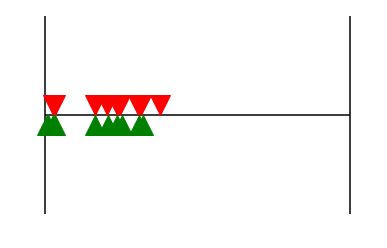

In [28]:
ax = fig2.add_subplot(111)
xmin = 1
xmax = len(result)
y = 5
height = 1

plt.hlines(y, xmin, xmax)
plt.vlines(xmin, y - height/2.0, y + height/2.0)
plt.vlines(xmax, y - height/2.0, y + height/2.0)

for pos in acceptor:
    plt.plot(pos, y+0.05, 'ro', ms =20 , mfc = 'r', marker = 'v')
    
for pos in donor:
    plt.plot(pos, y-0.05, 'go', ms = 20, mfc = 'g', marker = '^')
    
plt.axis('off')
plt.show()